'destroyedbuilding'

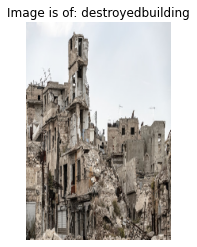

In [6]:
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


def classify_event(image):
    '''
    ADD YOUR CODE HERE
    '''
    device = "cuda"
    categories = ["combat","destroyedbuilding","fire","humanitarianaid","militaryvehicles"]

    path = "models/model_l.pth"
    model = torch.load(path)
    model.to(device)

    data_image = torchvision.io.read_image(str(image)).type(torch.float32)
    data_image /= 255

    IMG_SIZE = (256, 256)

    data_transform = transforms.Compose([
    transforms.Resize(size=IMG_SIZE),
    ])

    data_image_transformed = data_transform(data_image)

    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to image
        data_image_transformed_with_batch_size = data_image_transformed.unsqueeze(dim=0)
       
        # Make a prediction on image with an extra dimension
        data_image_pred = model(data_image_transformed.unsqueeze(dim=0).to(device))

    data_image_pred_label = torch.argmax(data_image_pred, dim=1)

    data_image_pred_class = categories[data_image_pred_label.cpu()]

    event = data_image_pred_class

    plt.imshow(data_image_transformed.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
    plt.title(f"Image is of: {event}")
    plt.axis(False)

    return event

name = "1"
classify_event(f'''E:/CNN Demo/images/{name}.jpg''')